<a href="https://colab.research.google.com/github/Skannan03/imarticus_project/blob/main/Resume_Screening_With_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Essence of Resume Screening :


---


It is the process of determining whether a candidate is qualified for a role based his or her education, experience, and other information captured on their resume.







*   It is a crucial yet challenging part of the hiring process.

*  On average, a recruiter spends 23 hours screening resumes for a single hire.

*   Even with automated processes, it is still the most time-consuming part of recruiting.
*   Save your time (Having a defined process will) :- Make the process more efficient and more accurate Find unqualified applicants quickly Result in a shortlist of candidates to interview who are aligned to the qualifications you’re looking for


*   This process will help you achieve your goal, to hire the most qualified and best-fitting applicant for the position.


---












#Problem Statement.....

---



---


Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labor-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task

---







#Approach

---



---



1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning


---




In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


#Load the dataset

In [64]:
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [65]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


#EDA

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [67]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [68]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

#Visualization

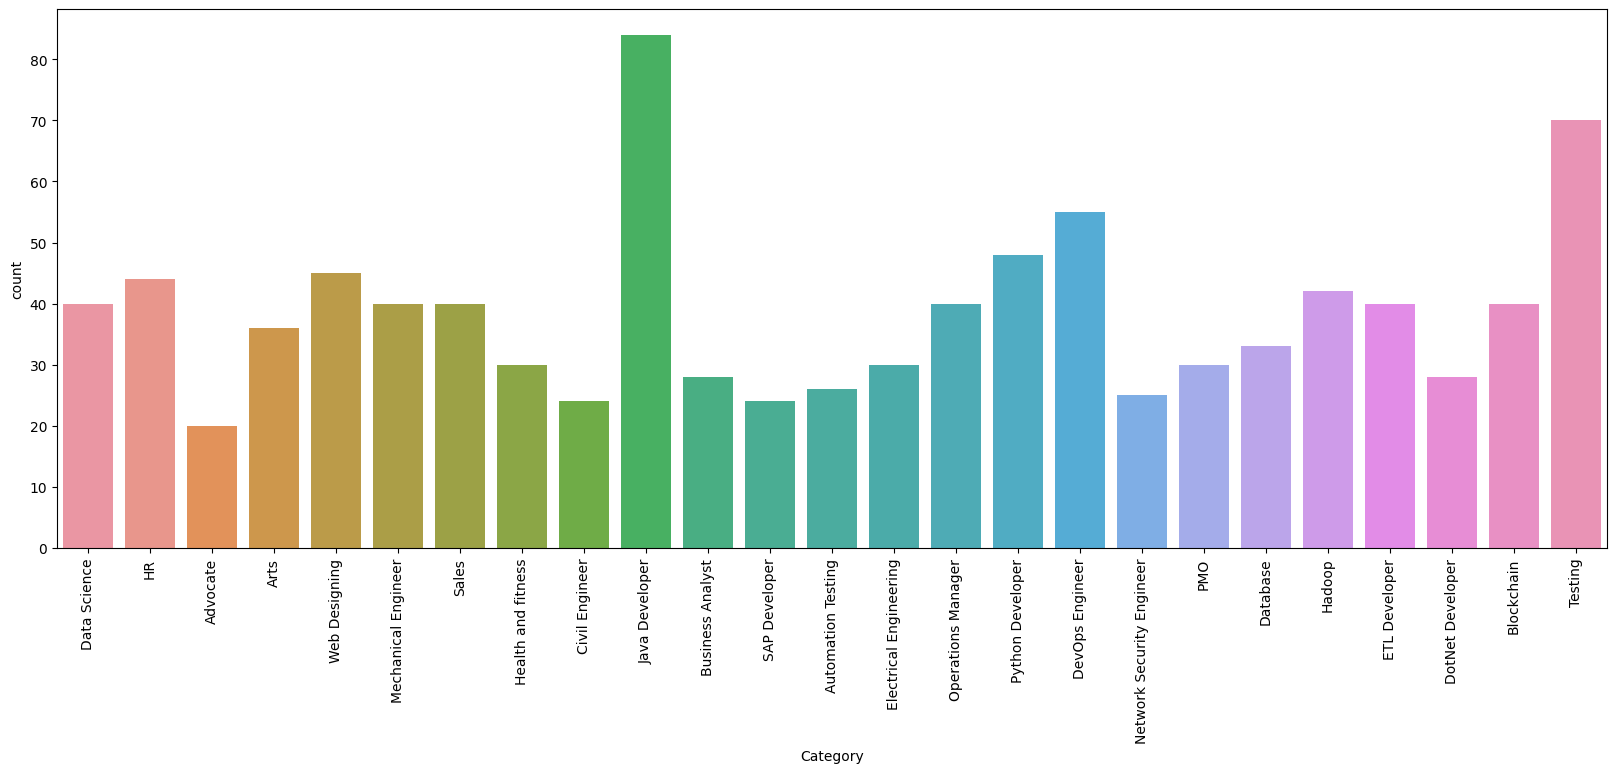

In [69]:

plt.figure(figsize=(20,7))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

#Cleaning the text

In [70]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
     # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)
     # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)
     # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)
     # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
     # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
     # remove extra whitespace
    return resumeText

df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [71]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Remove stop words

In [74]:
stopword=set(stopwords.words('english')+['``',"''"])
totwords=[]
sentence=df['Resume'].values
cleanedsentences=""
for records in sentence:
  cleanedtext=cleanResume(records)
  cleanedsentences+=cleanedtext
  requiredwords=nltk.word_tokenize(cleanedtext)
  for word in requiredwords:
    if word not in stopword and word not in string.punctuation:
      totwords.append(word)
wordfreq=nltk.FreqDist(totwords)
mostcommon=wordfreq.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


#Encoding the Data

In [75]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [76]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [77]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

#Splitting The Data

In [78]:
x= df['cleaned_resume'].values
y= df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(x)
WordFeatures = word_vectorizer.transform(x)


print ("Feature completed .....")

Feature completed .....


#Train test split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures,y,random_state=1, test_size=0.2,shuffle=True, stratify=y)
print(x_train.shape)
print(x_test.shape)

(769, 7351)
(193, 7351)


#Training the Models

In [80]:

knn=KNeighborsClassifier(n_neighbors=10)
svc=SVC()
rf=RandomForestClassifier()
dc=DecisionTreeClassifier()
bayes=MultinomialNB()

model=[knn,svc,rf,dc,bayes]
print("............................................")
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print(classification_report(y_test,y_pred))
  print('')
  print("score=",accuracy_score(y_test,y_pred))
  print("............................................")

............................................
KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.88      0.93         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       0.86      1.00      0.92         6
          10       0.89      1.00      0.94         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      0.83      0.91         6
          15       1.00      1.00      1.00        17

In [81]:
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

#Conclusion

In this Resume screening with NLP we have cleaned the dataset and tokenized the words and fit the models .

In which naivebayes algorithm performs well with high accuracy